# Урок 4. Сверточные нейронные сети
## Вариант 1. (простой)

## Оценить рост точности при увеличении глубины сети (больше слоев)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

from keras import models as m

import os

import matplotlib.pyplot as plt

import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

170508288/170498071 [==============================] - 6s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [3]:
labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [4]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

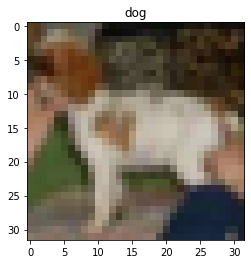

In [10]:
N = 12

plt.imshow(X_test[N])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [13]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# больше слоёв конволюций-пуллингов
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [14]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=128, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
391/391 [==============================] - 21s 25ms/step - loss: 2.3637 - accuracy: 0.1258 - val_loss: 2.3033 - val_accuracy: 0.1047
Epoch 2/25
391/391 [==============================] - 9s 23ms/step - loss: 2.1801 - accuracy: 0.1834 - val_loss: 2.0458 - val_accuracy: 0.2677
Epoch 3/25
391/391 [==============================] - 9s 23ms/step - loss: 1.9815 - accuracy: 0.2643 - val_loss: 1.8188 - val_accuracy: 0.3583
Epoch 4/25
391/391 [==============================] - 9s 23ms/step - loss: 1.8273 - accuracy: 0.3233 - val_loss: 1.6450 - val_accuracy: 0.4205
Epoch 5/25
391/391 [==============================] - 9s 23ms/step - loss: 1.7134 - accuracy: 0.3703 - val_loss: 1.6511 - val_accuracy: 0.4163
Epoch 6/25
391/391 [==============================] - 9s 23ms/step - loss: 1.6340 - accuracy: 0.4072 - val_loss: 1.4597 - val_accuracy: 0.4768
Epoch 7/25
391/391 [==============================] - 9s 23ms/step - loss: 1.5260 - accuracy: 0.4511 - val_loss: 1.5962 - val_accuracy: 0.429

In [15]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 2s 4ms/step - loss: 0.7708 - accuracy: 0.7377
Test loss 0.7708, accuracy 73.77%


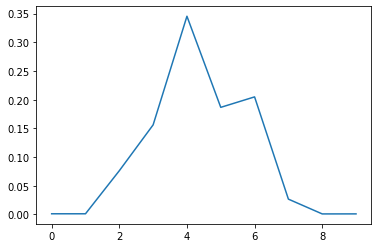

[0.0011756  0.00116221 0.07618287 0.15607773 0.34533674 0.18660216
 0.20484139 0.0266943  0.00093582 0.00099118]


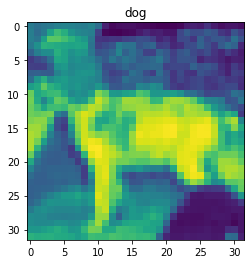

In [16]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

Выводы:
- меня совершенно не устраивают вероятностные графики, допускаю возможность исправить график дополнительными эпохами;
- в данном исполнении изменение количества слоев не привело к существенному изменению точности модели, в сравнении с моделью с измененным количеством ядер, но предполагаю, что количество слоев может позитивно влиять на точность модели в случае дополнительной настройки других параметров.